In [2]:
import numpy as np
import pandas as pd
import geopandas

turkey_map = geopandas.read_file('shp/tur_adm1.shp')
print(turkey_map)

                                             geometry
0   POLYGON ((36.31587 38.36376, 36.31769 38.36367...
1   POLYGON ((39.25297 38.18188, 39.25334 38.18159...
2   POLYGON ((31.14797 39.26246, 31.15825 39.25753...
3   POLYGON ((43.28706 40.01281, 43.29129 40.00884...
4   POLYGON ((33.96446 39.03804, 33.96453 39.03723...
..                                                ...
76  POLYGON ((29.74957 38.92497, 29.75259 38.92385...
77  POLYGON ((43.86293 39.35519, 43.86625 39.35450...
78  POLYGON ((29.53290 40.74757, 29.53292 40.73702...
79  POLYGON ((35.38648 40.24666, 35.38896 40.24665...
80  POLYGON ((32.12947 41.56021, 32.13194 41.55960...

[81 rows x 1 columns]


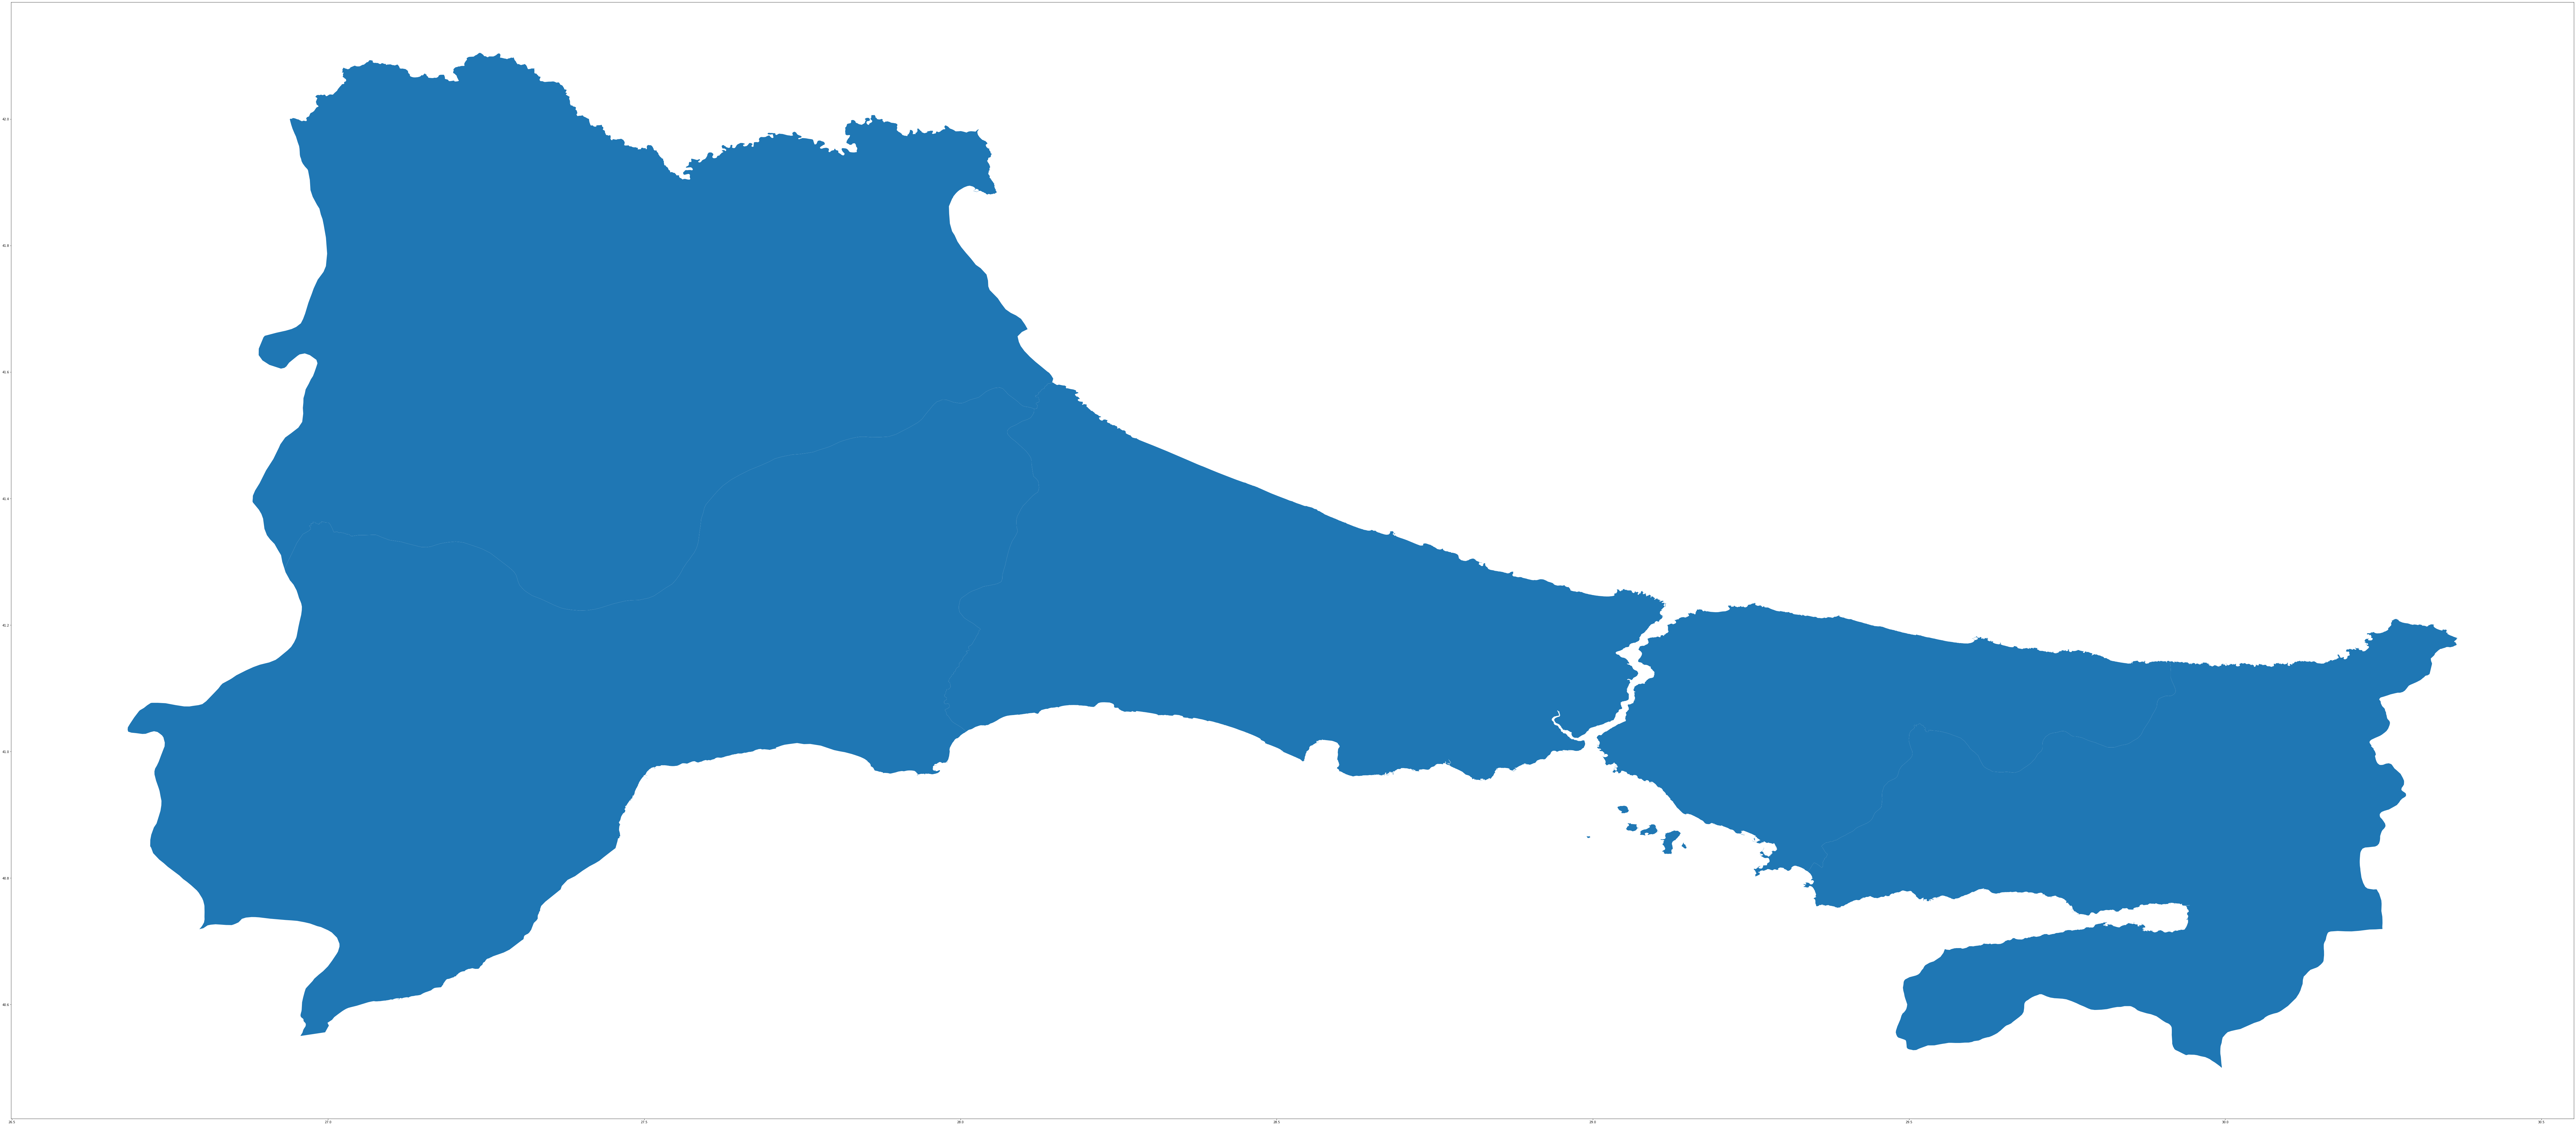

In [4]:
ist_map = turkey_map.cx[28:29.5, 41:42]
ist_map.plot(figsize=(150,150))

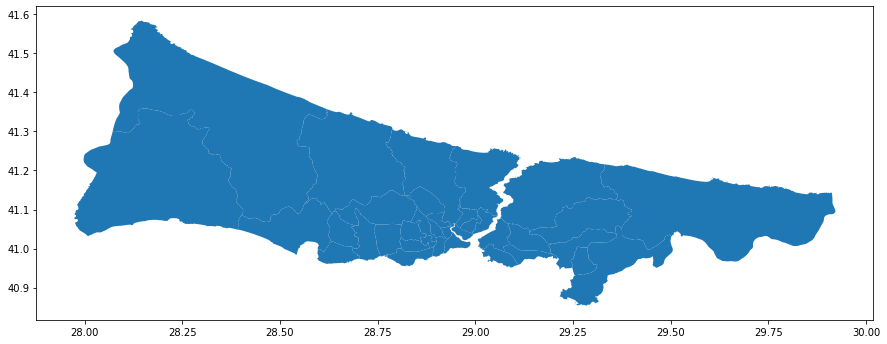

In [104]:
ilce = geopandas.read_file('shp/tur_adm2.shp')
ist_ilce = ilce.cx[28.25:29.322, 41:41.5]
ist_ilce.plot(figsize=(15,15))

In [6]:
base_station = pd.read_csv('data/base_tr.csv')
print(base_station.head())

  radio  mcc  net   area   cell  unit        lon        lat  range  samples  \
0   GSM  286    2  53202  19175     0  30.566361  37.772881   1000        2   
1   GSM  286    1  45120  32530     0  29.001502  37.760637   3028        3   
2   GSM  286    2  53506  26178     0  27.202835  38.439102   1000        1   
3   GSM  286    1  31306  54278     0  32.910655  39.953737   1000       13   
4   GSM  286    1  31306  23931     0  32.900620  39.953842   1000        6   

   changeable     created     updated  averageSignal  
0           1  1459746498  1494335030              0  
1           1  1459681790  1494251510              0  
2           1  1459682952  1459682952              0  
3           1  1459813818  1463300869              0  
4           1  1459813818  1464661043              0  


In [7]:
ist_base = base_station[(base_station["lat"]>= 40.25) & (base_station["lat"] <= 42) & (base_station["lon"] >= 27) & (base_station["lon"]<=31)]
print(ist_base)

       radio  mcc  net   area       cell  unit        lon        lat  range  \
6        GSM  286    1  21834       6424     0  29.076004  41.001663   1000   
7        GSM  286    3  23411      31971     0  29.099350  41.035995   1000   
10       GSM  286    2  55903       9167     0  28.013077  41.302414   1000   
62       GSM  286    2  52203      42324     0  27.111348  41.689331  33198   
63       GSM  286    2  53901      42202     0  27.046294  41.550129   8272   
...      ...  ...  ...    ...        ...   ...        ...        ...    ...   
684996   LTE  286    1   5945  205645087     0  28.847584  40.991470   1000   
684997   LTE  286    1   5945     669717     0  28.847584  40.991470   1000   
684998   LTE  286    1   5945    1624085     0  28.847584  40.991470   1000   
684999   LTE  286    1   5945    1991445     0  28.847584  40.991470   1000   
685000  UMTS  286    1  64534    1624086     0  28.847584  40.991470   1000   

        samples  changeable     created     updated

In [8]:
print("turkey", base_station.shape)
print("istanbul", ist_base.shape)

turkey (685002, 14)
istanbul (280375, 14)


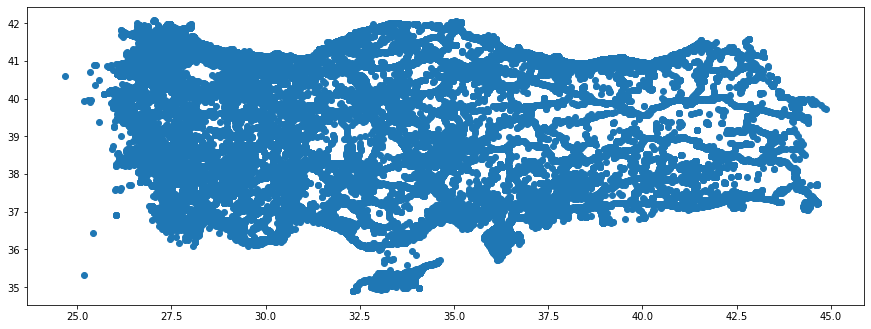

In [9]:
spatiel_base = geopandas.GeoDataFrame(base_station, geometry= geopandas.points_from_xy(base_station["lon"],base_station["lat"]))
spatiel_base.plot(figsize=(15,15))

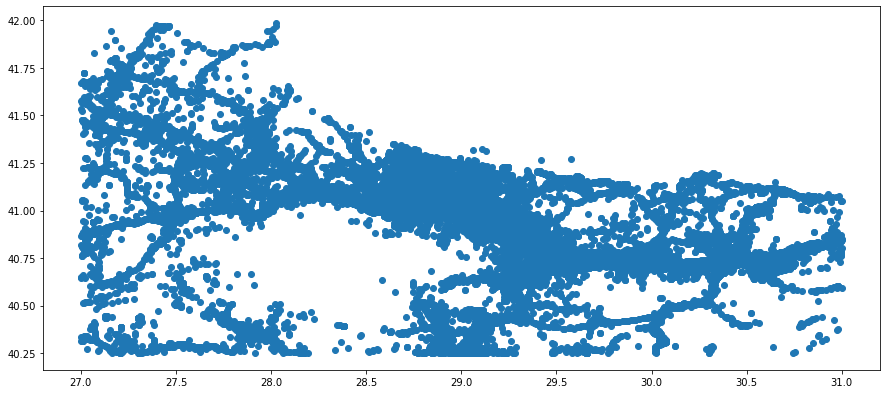

In [10]:
spatiel_base = geopandas.GeoDataFrame(ist_base, geometry= geopandas.points_from_xy(ist_base["lon"],ist_base["lat"]))
spatiel_base.plot(figsize=(15,15))

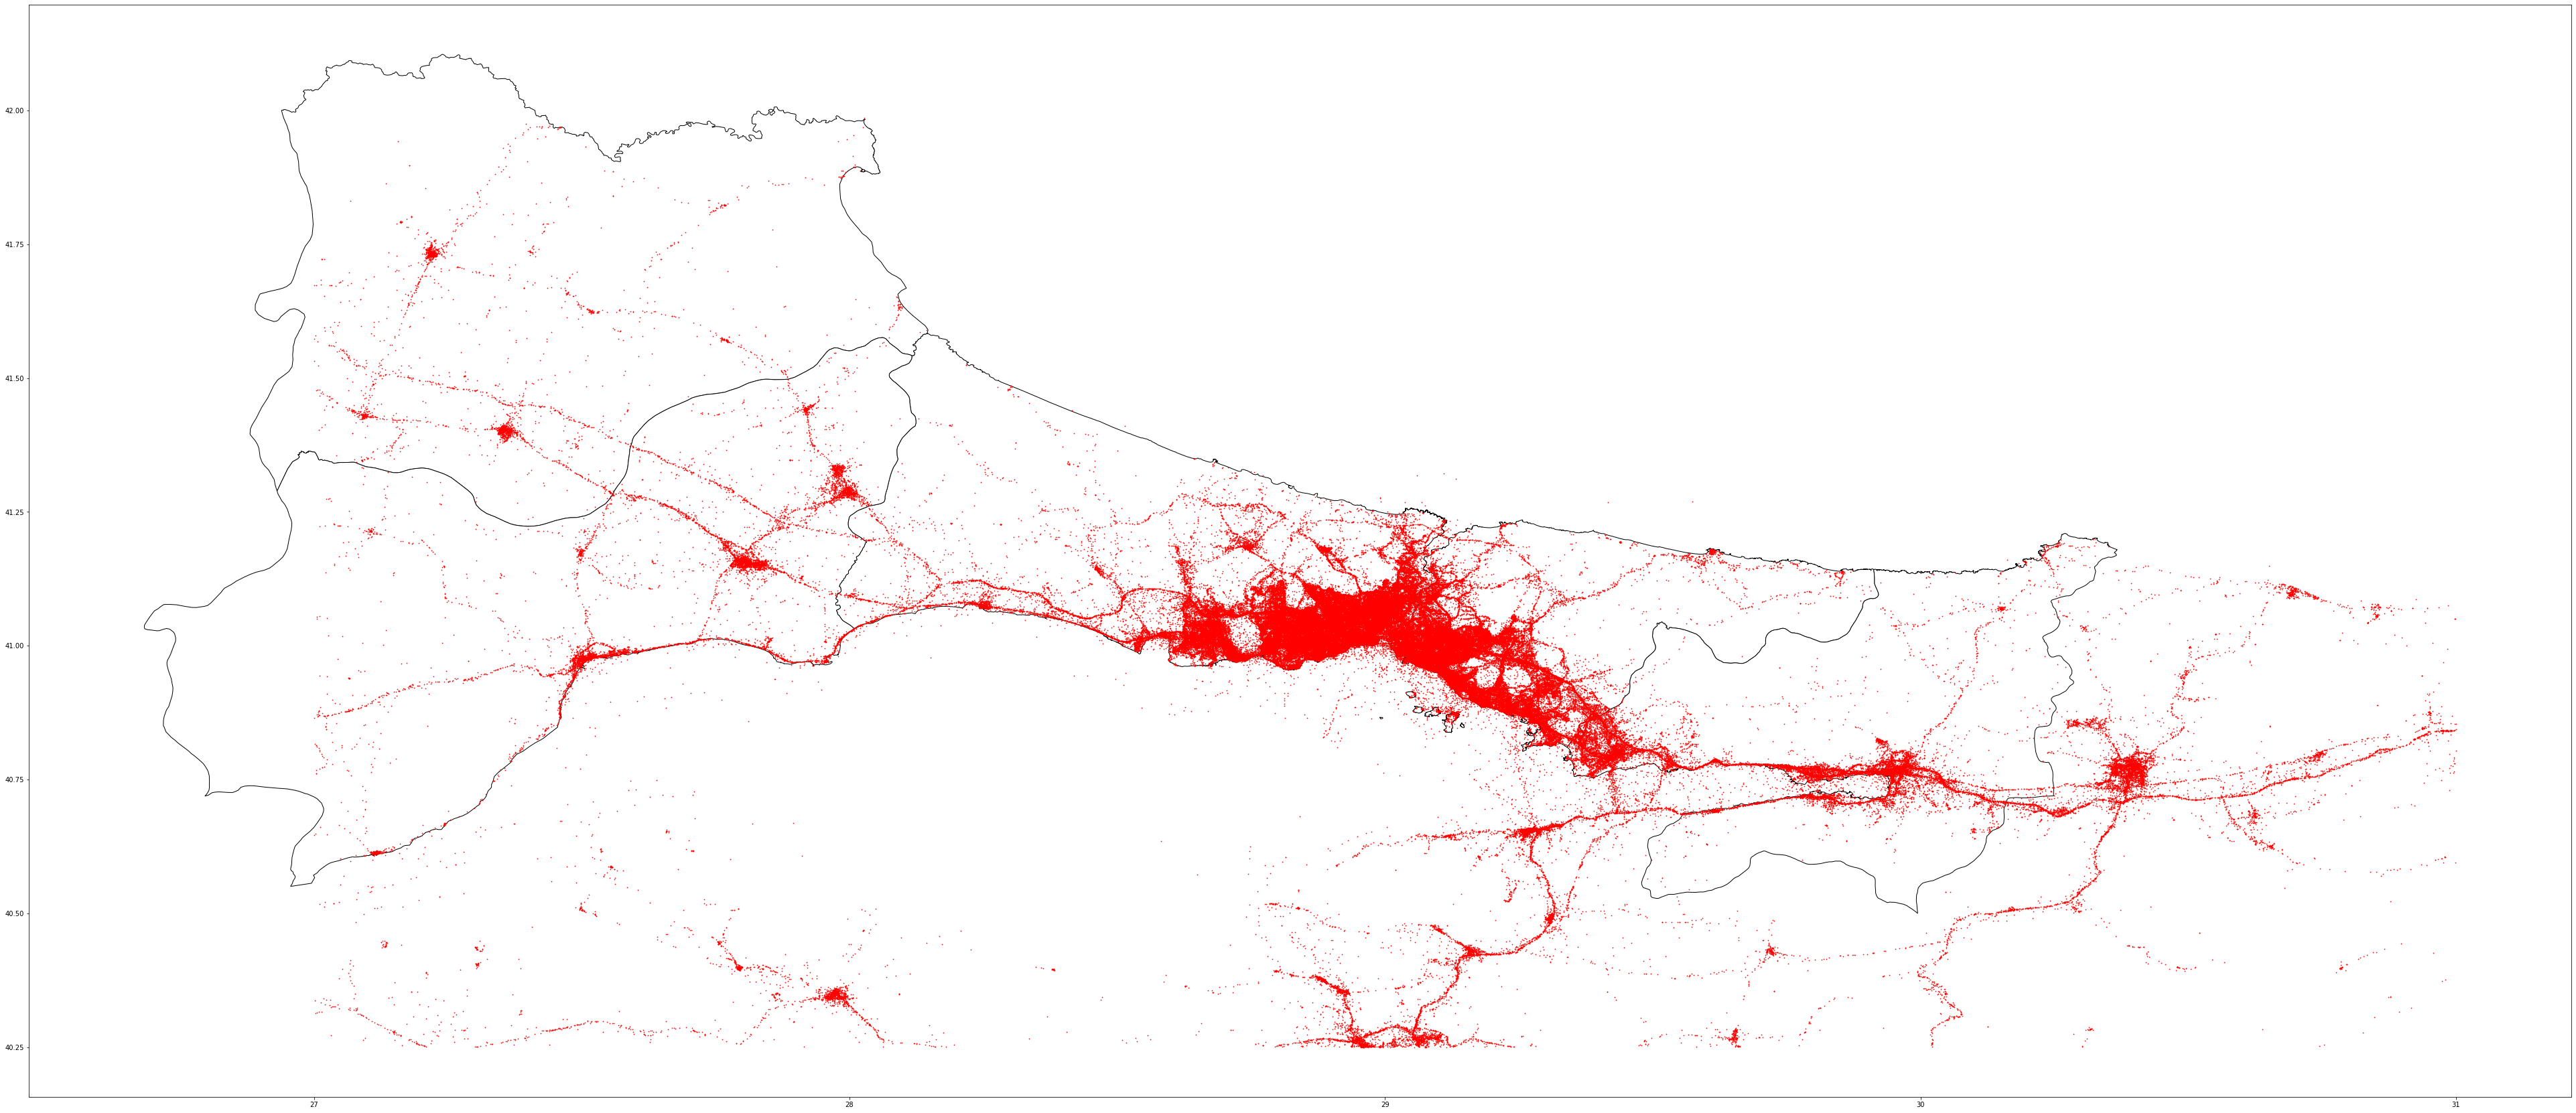

In [11]:
ax = ist_map.plot(figsize=(70,30),color='white', edgecolor='black')
spatiel_base.plot(ax=ax,color='red', markersize=0.5)